**Benches**

HPO toolkit benchmarks.

In [1]:
%matplotlib inline

import os
import typing

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
fpath_bench_dir = os.path.join(os.curdir, 'history')

# Graph traversal

Benches defined in `graph_traversal.py`.

## Load benches

In [3]:
graph_traversal_benches = (
    'graph_traversal-1000-v0.4.0.csv.gz',
    'graph_traversal-1000-v0.4.3.csv.gz',
)

In [4]:
benches = pd.concat((pd.read_csv(os.path.join(fpath_bench_dir, fpath_bench)) for fpath_bench in graph_traversal_benches))
benches = benches.set_index(['revision', 'payload', 'method', 'group']).sort_index()
benches.head(2)

throughput
revision payload                                   method           group                              
v0.4.0   Abnormality of the upper arm [HP:0001454] get_ancestor_idx IndexedOntologyGraph  111323.218417
                                                   get_ancestors    IndexedOntologyGraph   73741.184439

Loaded benches for the following revisions:

In [5]:
benches.index.levels[0].tolist()

['v0.4.0', 'v0.4.3']

## Visualize

In [6]:
def plot_throughputs(df):
    payloads = df.index.levels[0]

    fig, axs = plt.subplots(1, len(payloads), 
                            figsize=(4*len(payloads), 4), dpi=120,
                            sharey=True,
                           )
    
    for i, payload in enumerate(payloads):
        ax = axs[i]
        data = df.loc[payload].reset_index()
    
        sns.barplot(
            data=data,
            x='method', y='throughput', hue='group',
            ax=ax,
        )
        ax.set(title=payload, xlabel=None, ylim=(9e-1, 1e7), yscale='log')
        ax.grid(axis='y')
        ax.yaxis.set(major_formatter=mpl.ticker.LogFormatter())
        plt.setp(ax.xaxis.get_ticklabels(), rotation=90)

        if i == 0:
            ax.set(ylabel=f'throughput{os.linesep}[ops/s]')
        else:
            ax.set(ylabel=None)
        
        if i == len(payloads) - 1:
            # last column
            ax.legend_.set(bbox_to_anchor=(.95, .5))
        else:
            ax.legend_.set(visible=False)
    
    return fig

### `v0.4.0`

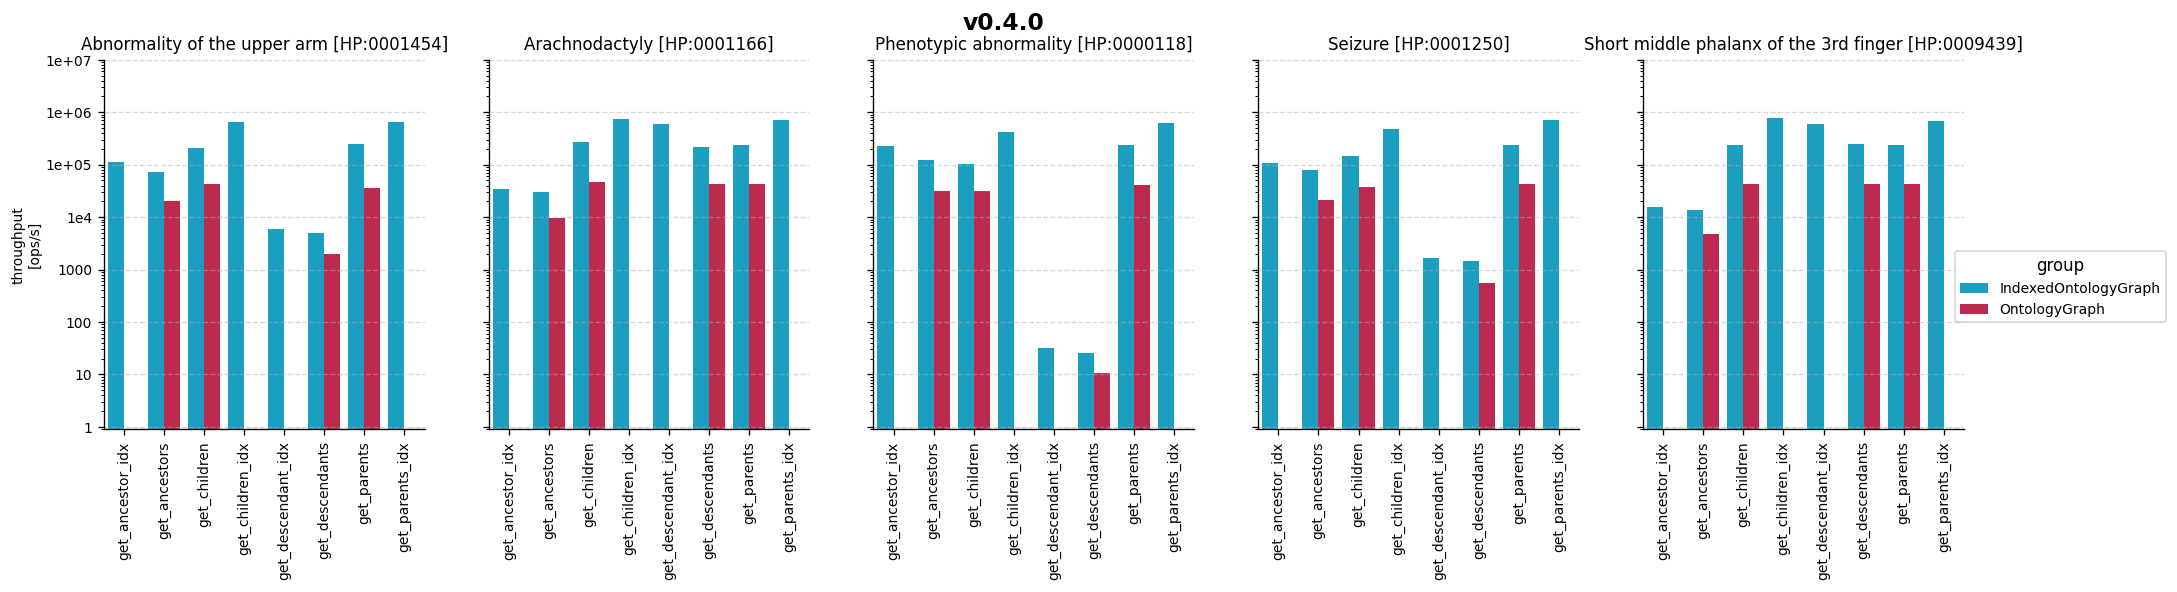

In [7]:
revision = 'v0.4.0'
df = benches.loc[revision]

fig = plot_throughputs(df)
fig.suptitle(revision);

### `v0.4.3`

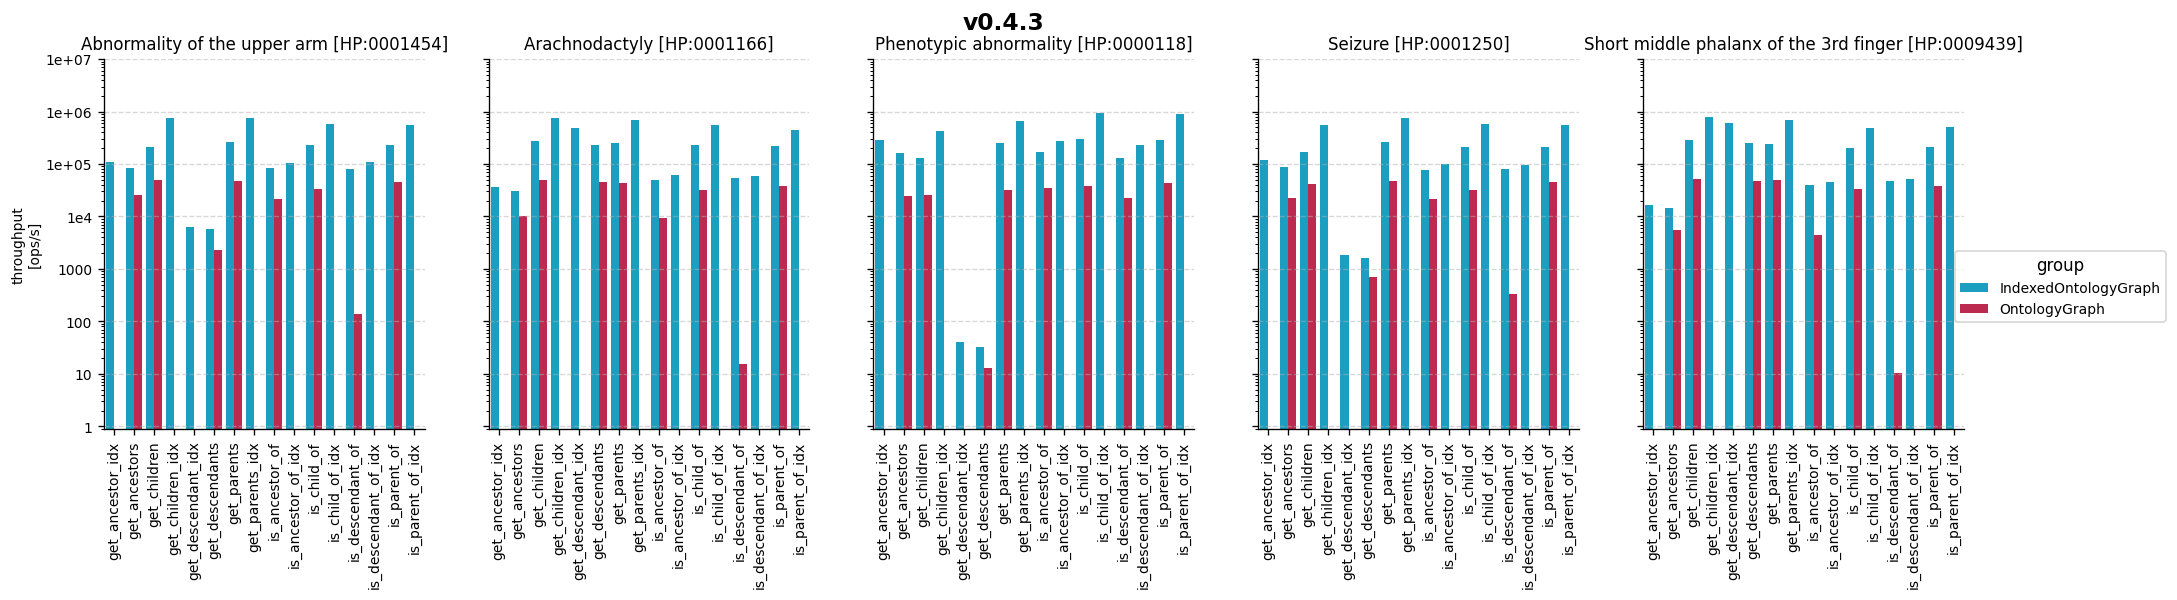

In [8]:
revision = 'v0.4.3'
df = benches.loc[revision]

fig = plot_throughputs(df)
fig.suptitle(revision);

EOF